In [1]:
from pckt import *

path = '~/DAPPEr/data/UDIP4/json/UDIP_4_800s.json'

In [2]:
dat = pck(path, 251, 'Full')
iv = dat.iv

In [3]:
iv['dI_dV'] = np.abs(iv['I0'].rolling(5).mean().diff())

2.7375366568914963


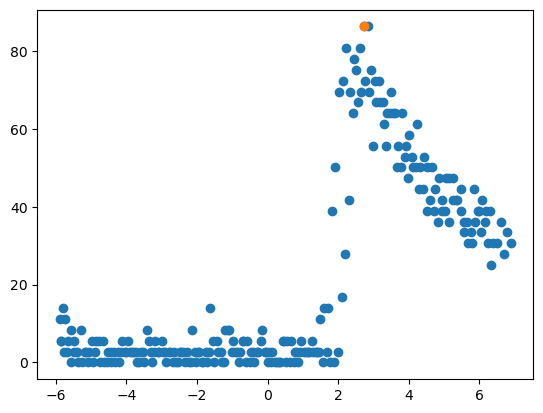

In [4]:
plt.scatter(iv['V'], iv['dI_dV'])
ind = iv['dI_dV'].argmax()
plt.scatter(iv['V'][ind], iv['dI_dV'][ind])

print(iv['V'][ind])

In [5]:
# zero_crossings = np.where(np.diff(np.sign(iv['I0'])))[0]
# V = iv['V']
# I = iv['I0']
# # Linear interpolation between points where current crosses zero
# i0 = zero_crossings[0]
# Vf = V[i0] - I[i0] * (V[i0+1] - V[i0]) / (I[i0+1] - I[i0])

In [6]:
# print(Vf)

In [7]:
print()

/tmp/ipykernel_2140303/935744751.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iv_av = iv.rolling(2).mean().fillna(method = 'bfill')


46     2.183834
187    0.379949
188    0.487903
189    0.588893
191    0.787390
193    0.992852
Name: V, dtype: float64


/tmp/ipykernel_2140303/935744751.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iv_av = iv.rolling(2).mean().fillna(method = 'bfill')


45    2.295271
Name: V, dtype: float64


/tmp/ipykernel_2140303/935744751.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iv_av = iv.rolling(2).mean().fillna(method = 'bfill')


47    2.086327
Name: V, dtype: float64


/tmp/ipykernel_2140303/935744751.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iv_av = iv.rolling(2).mean().fillna(method = 'bfill')


47    2.086327
Name: V, dtype: float64


/tmp/ipykernel_2140303/935744751.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iv_av = iv.rolling(2).mean().fillna(method = 'bfill')


47    2.079362
Name: V, dtype: float64
47    2.086327
Name: V, dtype: float64


/tmp/ipykernel_2140303/935744751.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iv_av = iv.rolling(2).mean().fillna(method = 'bfill')


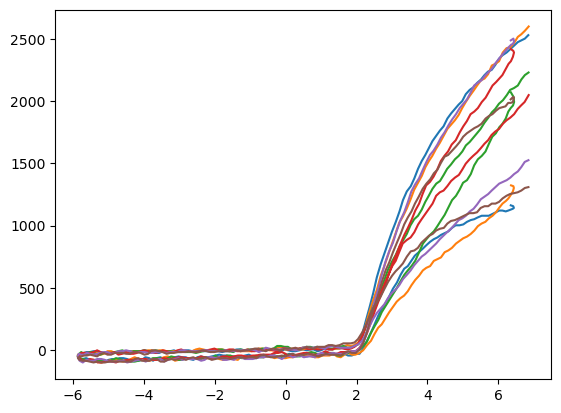

In [63]:
Vf = np.array([])
VP = np.array([])
for i in np.arange(255,261):
    dat = pck(path, i, 'Full')
    iv = dat.iv
    iv_av = iv.rolling(2).mean().fillna(method = 'bfill')
    ind = 0
    iv_av['dI_dV'] = np.abs(iv_av['I0'].diff())
    plt.plot(iv_av['V'], iv_av['I0'])
    # plt.plot(iv_av['V'], iv_av['dI_dV'])
    VP_ind = iv_av['dI_dV'].argmax()
    VP = np.append(VP, iv_av['V'][VP_ind])
    
    zero = np.where(np.diff(np.sign(iv_av['I0'])))[0]
    Vf_lim = iv_av['V'][zero][(iv_av['V'] < VP[ind]) & (iv_av['V'] > 0)]
    print(Vf_lim)
    Vf = np.append(Vf, np.nanmean(Vf_lim))
    ind = ind + 1
    # print(zero[0])
    # Vf = 

In [62]:
print(VP)
print(Vf)

[2.57038123 2.68181818 2.46590909 2.82459677 2.29527126 2.28830645]
[0.90347019 2.29527126 2.08632698 2.08632698 2.07936217 2.08632698]


In [59]:
print(Vf)

[0.90347019 2.29527126 2.08632698 2.08632698 2.07936217 2.08632698]
